### Pandas

In [1]:
import os
import pandas as pd
%matplotlib inline

**Pandas** (Python Data Analysis Library) — библиотека языка Python сделанная для [простого] анализа данных.

Сегодня будем смотреть на известные [данныe](https://www.kaggle.com/c/titanic/data) про Титаник из [соревнования на платформе kaggle](https://www.kaggle.com/c/titanic). Цель соревнования: предсказать выживет ли пассажир после крушения.

Скачаем данные

In [2]:
if not os.path.exists('data/titanic.csv'):
    if not os.path.exists('data'):
        os.makedirs('data')
    os.system('wget -O data/titanic.csv https://www.dropbox.com/s/1qtgllk0d89bt3d/titanic.csv?dl=1')

Pandas использует `pd.DataFrame` объект для загрузки и хранения данных.

In [3]:
pass_data = pd.read_csv('titanic.csv')

Dataset это таблица: каждая строка это объект, каждый столбец - feature(свойство). Давайте посмотрим на первый значения методом `.head()`

In [4]:
pass_data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Названия столбцов:

In [5]:
pass_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Индексация совсем как в Numpy, очень удобно

In [6]:
pass_data[2:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
pass_data.iloc[1:5, 1:3]

,survived,name
1,1,"Allison, Master. Hudson Trevor"
2,0,"Allison, Miss. Helen Loraine"
3,0,"Allison, Mr. Hudson Joshua Creighton"
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


In [8]:
pass_data['name'].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [9]:
pass_data[['name', 'sex', 'parch']].head()

,name,sex,parch
0,"Allen, Miss. Elisabeth Walton",female,0
1,"Allison, Master. Hudson Trevor",male,2
2,"Allison, Miss. Helen Loraine",female,2
3,"Allison, Mr. Hudson Joshua Creighton",male,2
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,2


Логическая индексация тоже работает

In [10]:
pass_data[pass_data['sex'] == 'female'].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


Выведем женщин старже 60 и мужчин

In [11]:
pass_data[(pass_data['sex'] == 'female') & (pass_data['age'] >= 60) | (pass_data['sex'] == 'male')].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"


Давайте посмотрим как моного одиноких женщин было на коробле

In [12]:
pass_data[(pass_data.sex == 'female') &
          (pass_data.age > 18) &
          (pass_data.age < 25) &
          (pass_data.sibsp == 0) &
          (pass_data.parch == 0)].shape

(41, 14)

Ещё можно строить гистограммы

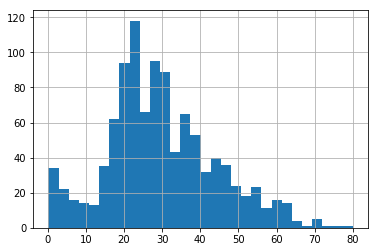

In [13]:
pass_data.age.hist(bins=30)

Давайте переименуем колонку

In [14]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Часто для первичной обработки данных хочется применить ко всему столбцу какую-нибудь функцию


In [15]:
def get_last_name(name):
    return name.split(',')[0].strip()

last_names = pass_data['name'].apply(get_last_name)
last_names.head()

0      Allen
1    Allison
2    Allison
3    Allison
4    Allison
Name: name, dtype: object

Добавим столбец к нашему датасету

In [16]:
pass_data['Last_name'] = last_names
pass_data.head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Last_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison


Удалим столбец

In [17]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Часто в датасете бывают пустые значения, что-то неизвестное про конкретного пассажира.

`.isnull()` и `.notnull()` позволяют получить бинарный массив с соответствующими значениями

In [18]:
pass_data['boat'].isnull().head()

0    False
1    False
2     True
3     True
4     True
Name: boat, dtype: bool

Пассажиры с известными номерами спасательных лодок

In [19]:
pass_data[pass_data['boat'].notnull()].head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


Сортировка и выборка фич

In [20]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool


In [21]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


#### Агрегирование данных

`.groupby()` метод позволяет группировать данные по какому-нибудь критерию.

`Shift` + `Tab` когад курсор внутри скобок позволяет посмотреть в документацию. Не стесняйтесь нажать `Tab` нескольно раз.

In [29]:
pass_data.groupby('Sex')

In [23]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         216
        1         144
        2         106
male    3         493
        1         179
        2         171
Name: pclass, dtype: int64

In [24]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


Средний возраст по пассажирам в зависимости от возраста

In [25]:
pass_data.groupby('Sex')['age'].mean() # average age of passengers depending on sex

Sex
female    28.687088
male      30.585228
Name: age, dtype: float64

Женщин и детей спасают первыми, давайте проверим.

In [26]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

Посмотрим на разные классы пасажиров

In [27]:
pass_data.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Сохраним обработанные данные на диск

In [28]:
pass_data.to_csv('data/titanic_2.csv', index=False)